In [ ]:
PUC Minas - Pontifícia Universidade Católica de Minas Gerais

Pós-Graduação em Ciência de Dados e Big Data

TRABALHO DE CONCLUSÃO DE CURSO

In [ ]:
Aluna: Lilian Campos Soares

Matrícula: 1092883

In [ ]:
Este notebook é referente aos códigos elaborados em Python e utilizados no Trabalho de Conclusão de Curso em Ciência de Dados e Big Data da Pós-Graduação da PUC Minas, especificamente para a interpretação dos modelos de Machine Learning.

In [2]:
#Carregamento de bibliotecas gerais
import pandas as pd 
import numpy as np
import seaborn as sns
import shutil
import os
import io
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
# Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [7]:
#Configurando os plots para serem exibidos diretamente no notebook
%matplotlib inline

In [50]:
#Importação dos dados para interpretação dos resultados - arquivos datatran e acidentes.CSV
acidentes_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\acidentes_mg5.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory = False, parse_dates = ['data_inversa'])
datatran_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\datatran_mg4.csv", sep=';', decimal=',', encoding = 'cp1252', low_memory = False, parse_dates = ['data_inversa'])

In [9]:
#Verificando os dataframes acidentes e datatran
acidentes_mg.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,sexo,latitude,longitude,elemento_transito,ilesos,feridos_graves,feridos_leves,mortos
0,47,44,2017-01-01,domingo,04:50:00,MG,381,605.0,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Condutor,Lesões Leves,Masculino,-20.6370,-44.7357,Homem,0,0,1,0
1,47,45,2017-01-01,domingo,04:50:00,MG,381,605.0,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,Automóvel,Passageiro,Lesões Leves,Masculino,-20.6370,-44.7357,Homem,0,0,1,0
2,52,1528,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Masculino,-19.9566,-44.3444,Homem,0,0,1,0
3,52,1526,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Passageiro,Lesões Leves,Feminino,-19.9566,-44.3444,Homem,0,0,1,0
4,52,1519,2017-01-01,domingo,05:00:00,MG,262,368.0,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,Automóvel,Condutor,Lesões Leves,Masculino,-19.9566,-44.3444,Homem,0,0,1,0


In [36]:
datatran_mg.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,ilesos,feridos_leves,feridos_graves,feridos,mortos,veiculos,latitude,longitude,elemento_transito
0,47,2017-01-01,domingo,04:50:00,MG,381,605,OLIVEIRA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Céu Claro,Dupla,Reta,Rural,2,0,2,0,2,0,1,-20.6370,-44.7357,Homem
1,52,2017-01-01,domingo,05:00:00,MG,262,368,JUATUBA,Velocidade Incompatível,Colisão com objeto estático,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Viaduto,Urbano,3,0,3,0,3,0,1,-19.9566,-44.3444,Homem
2,53,2017-01-01,domingo,05:00:00,MG,459,14,CALDAS,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Amanhecer,Céu Claro,Simples,Curva,Rural,1,1,0,0,0,0,1,-21.8459,-46.4388,Homem
3,61,2017-01-01,domingo,05:00:00,MG,262,186,SAO DOMINGOS DO PRATA,Condutor Dormindo,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Céu Claro,Simples,Curva,Rural,1,0,1,0,1,0,1,-19.8942,-43.0403,Homem
4,63,2017-01-01,domingo,06:00:00,MG,135,408,BOCAIUVA,Animais na Pista,Atropelamento de Animal,Com Vítimas Feridas,Amanhecer,Céu Claro,Simples,Reta,Rural,3,2,1,0,1,0,1,-16.9614,-43.8590,Via


In [37]:
#Nova análise e exploração dos dados
Quantidade_acidentes = datatran_mg.shape[0]
print("Acidentes em MG (2017 a 2020): " + str(Quantidade_acidentes))

Acidentes em MG (2017 a 2020): 38835


In [38]:
datatran_mg['data_inversa'] = datatran_mg.data_inversa.astype('datetime64')
Acidentes_por_ano = datatran_mg.groupby(datatran_mg['data_inversa'].dt.strftime('%Y'))['id'].count().sort_values(ascending=False)
print("Acidentes por ano em MG (2017 a 2020): " + str(Acidentes_por_ano))

Acidentes por ano em MG (2017 a 2020): data_inversa
2017    12711
2018     9055
2019     8713
2020     8356
Name: id, dtype: int64


In [39]:
Total_de_feridos = datatran_mg['feridos'].sum()
print("Feridos em acidentes em MG (2017 a 2020): " + str(Total_de_feridos))
#O total de feridos antes dos valores de predição era de 46100

Feridos em acidentes em MG (2017 a 2020): 48157


In [40]:
Feridos_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'feridos': 'sum'})
print("Feridos em acidentes por ano em MG (2017 a 2020): " + str(Feridos_por_ano))
#Percebe-se a alteração de totais de feridos por ano

Feridos em acidentes por ano em MG (2017 a 2020):       feridos
Ano          
2017    13678
2018    11677
2019    11875
2020    10927


In [51]:
Total_de_mortos = datatran_mg['mortos'].sum()
print("Mortos em acidentes em MG (2017 a 2020): " + str(Total_de_mortos))
#O total de mortos antes dos valores de predição era de 2957

Mortos em acidentes em MG (2017 a 2020): 3472


In [52]:
Mortos_por_ano = datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano')]).agg({'mortos': 'sum'})
print("Mortos em acidentes por ano em MG (2017 a 2020): " + str(Mortos_por_ano))
#Percebe-se a alteração de totais de mortos por ano

Mortos em acidentes por ano em MG (2017 a 2020):       mortos
Ano         
2017    1015
2018     822
2019     799
2020     836


In [43]:
Quantidade_pessoas = datatran_mg['pessoas'].sum()
Quantidade_veiculos = datatran_mg['veiculos'].sum()
print("Envolvidos em acidentes em MG (2017 a 2020): \n Pessoas: " + str(Quantidade_pessoas) + "\n " + "Veículos envolvidos: " + str(Quantidade_veiculos))
#Sem alterações nestes valores

Envolvidos em acidentes em MG (2017 a 2020): 
 Pessoas: 91789
 Veículos envolvidos: 59176


In [44]:
Estado_fisico = acidentes_mg.groupby(['estado_fisico']).size()
print("Estado físico dos envolvidos em MG (2017 a 2020): " + str(Estado_fisico))
#Os totais por categoria sofreram alterações

Estado físico dos envolvidos em MG (2017 a 2020): estado_fisico
Ileso            40160
Lesões Graves    10382
Lesões Leves     37775
Óbito             3472
dtype: int64


In [45]:
Quantidade_envolvidos = acidentes_mg.shape[0]
perc_ileso = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Ileso'].count() / Quantidade_envolvidos) *100
perc_lesgr = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Lesões Graves'].count() / Quantidade_envolvidos) *100
perc_leslv = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Lesões Leves'].count() / Quantidade_envolvidos) *100
perc_nainf = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Não Informado'].count() / Quantidade_envolvidos) *100
perc_obito = (acidentes_mg['id'][acidentes_mg['estado_fisico'] == 'Óbito'].count() / Quantidade_envolvidos) *100
#print(f"% Estado físico dos envolvidos em MG (2017 a 2020): \n Ileso- {perc_ileso},\n Lesões Graves {perc_lesgr},\n Lesões Leves {perc_leslv},\n Não Informado {perc_nainf},\n Óbito {perc_obito} ")
print("% Estado físico dos envolvidos em MG (2017 a 2020): \n Ileso " + "%.2f" % perc_ileso + "\n Lesões Graves " + "%.2f" % perc_lesgr + "\n Lesões Leves " + "%.2f" % perc_leslv + "\n Não Informado " + "%.2f" % perc_nainf + "\n Óbito " + "%.2f" % perc_obito)
#Agora não existe mais a categora de Não Informado

% Estado físico dos envolvidos em MG (2017 a 2020): 
 Ileso 43.75
 Lesões Graves 11.31
 Lesões Leves 41.15
 Não Informado 0.00
 Óbito 3.78


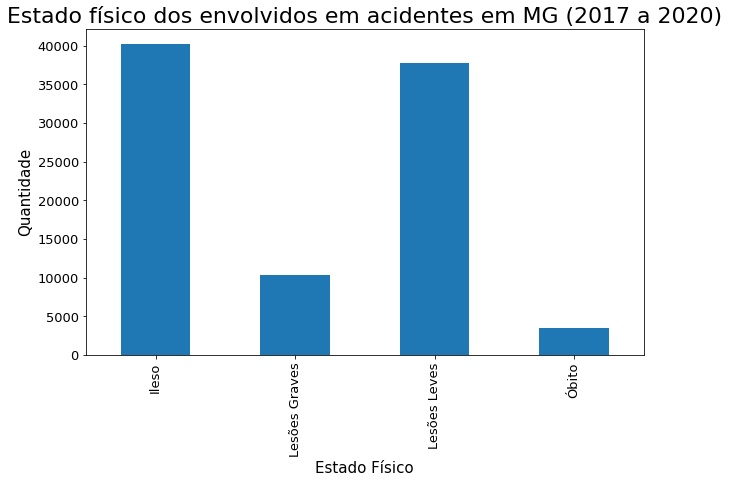

In [46]:
ax = Estado_fisico.plot(kind='bar', figsize=(10,6), fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Estado Físico", fontsize=15);
plt.show()

In [47]:
acidentes_mg['data_inversa'] = acidentes_mg.data_inversa.astype('datetime64')
Estado_fisico_por_ano = acidentes_mg.groupby([acidentes_mg['data_inversa'].dt.year.rename('Ano'), acidentes_mg['estado_fisico']]).agg({'id': 'count'})
print("Estado físico dos envolvidos por ano em MG (2017 a 2020): " + str(Estado_fisico_por_ano))

Estado físico dos envolvidos por ano em MG (2017 a 2020):                        id
Ano  estado_fisico       
2017 Ileso          13980
     Lesões Graves   2818
     Lesões Leves   10948
     Óbito           1035
2018 Ileso           9433
     Lesões Graves   2445
     Lesões Leves    9160
     Óbito            819
2019 Ileso           8694
     Lesões Graves   2612
     Lesões Leves    9270
     Óbito            788
2020 Ileso           8053
     Lesões Graves   2507
     Lesões Leves    8397
     Óbito            830


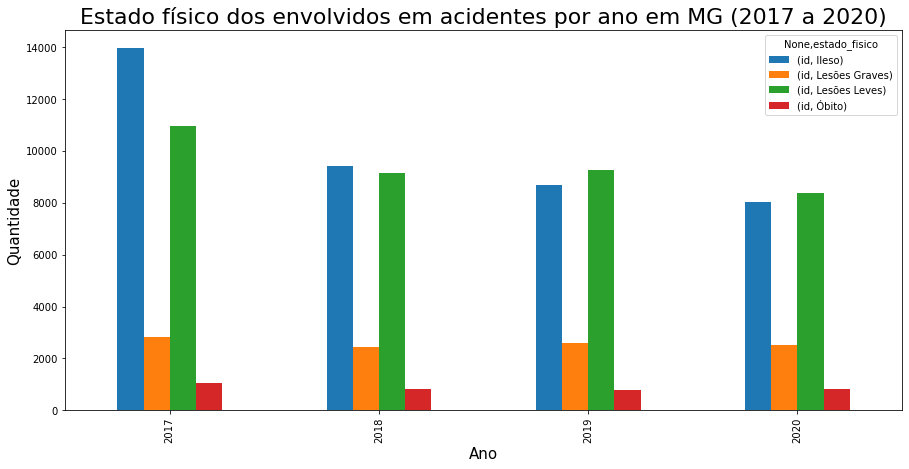

In [48]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_mg.groupby([acidentes_mg['data_inversa'].dt.year.rename('Ano'), acidentes_mg['estado_fisico']]).agg({'id': 'count'}).unstack().plot(kind='bar', ax=ax)
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

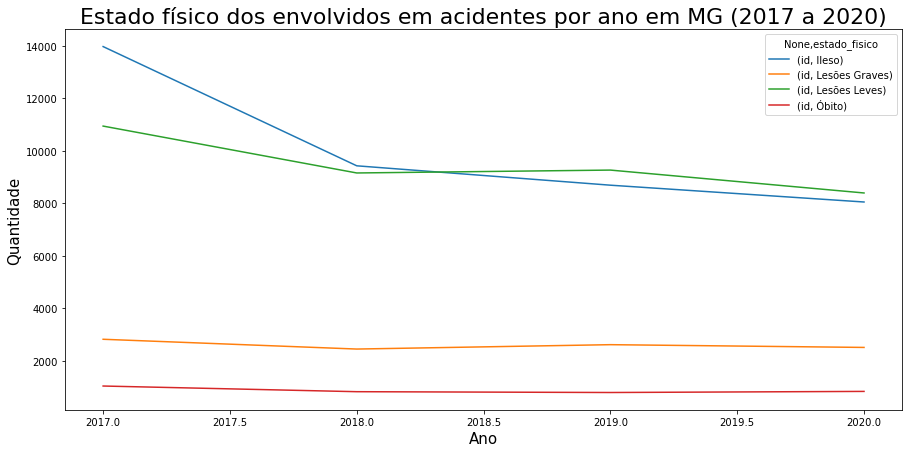

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
acidentes_mg.groupby([acidentes_mg['data_inversa'].dt.year.rename('Ano'), acidentes_mg['estado_fisico']]).agg({'id': 'count'}).unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes por ano em MG (2017 a 2020)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

In [55]:
Classificacao_de_acidentes = datatran_mg.groupby(['classificacao_acidente']).size()
print("Classificação de acidentes em MG (2017 a 2020): " + str(Classificacao_de_acidentes))
#A classificação de acidentes não sofreu mudanças em quantidades totais

Classificação de acidentes em MG (2017 a 2020): classificacao_acidente
Com Vítimas Fatais      2375
Com Vítimas Feridas    27966
Sem Vítimas             8494
dtype: int64


In [ ]:
#Ajustes nos indicadores relacionados aos acidentes de MG

#Classificação por gravidade dos acidentes
#print(str(datatran_mg.groupby(['br','classificacao_acidente']).size()))
class_acid = pd.DataFrame(datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['br'], datatran_mg['classificacao_acidente']]).agg({'id': 'count'}).reset_index())
class_acid.rename(columns={'br':'BR'}, inplace=True)
class_acid.rename(columns={'id':'Acidentes'}, inplace=True)
class_acid['Sem_Vitimas'] = '0'
class_acid['Com_Vitimas_Feridas'] = '0'
class_acid['Com_Vitimas_Fatais'] = '0'
class_acid['BR'] = class_acid.BR.astype('object')
class_acid['Sem_Vitimas'] = class_acid.Sem_Vitimas.astype('int64')
class_acid['Com_Vitimas_Feridas'] = class_acid.Com_Vitimas_Feridas.astype('int64')
class_acid['Com_Vitimas_Fatais'] = class_acid.Com_Vitimas_Fatais.astype('int64')
class_acid.loc[class_acid['classificacao_acidente'] == 'Com Vítimas Fatais', 'Com_Vitimas_Fatais'] = class_acid['Acidentes']
class_acid.loc[class_acid['classificacao_acidente'] == 'Com Vítimas Feridas', 'Com_Vitimas_Feridas'] = class_acid['Acidentes']
class_acid.loc[class_acid['classificacao_acidente'] == 'Sem Vítimas', 'Sem_Vitimas'] = class_acid['Acidentes']
class_acid.drop(columns=['classificacao_acidente'], axis=1, inplace=True)
class_acid.drop(columns=['Acidentes'], axis=1, inplace=True)
class_acidentes = pd.DataFrame(class_acid.groupby([class_acid['Ano'], class_acid['BR']]).agg({'Sem_Vitimas' : 'sum', 'Com_Vitimas_Feridas' : 'sum', 'Com_Vitimas_Fatais' : 'sum'}).reset_index())
#class_acidentes.head(10)

#Extensões por trecho de BR
snv_2017_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\SNV_201801B_3.csv", sep=';', decimal=',', encoding = 'utf_8')
snv_2018_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\snv_201903a_3.csv", sep=';', decimal=',', encoding = 'utf_8')
snv_2019_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\SNV_202001A_3.csv", sep=';', decimal=',', encoding = 'utf_8')
snv_2020_mg = pd.read_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\SNV_202101A_3.csv", sep=';', decimal=',', encoding = 'utf_8')
snv_2017_mg.drop(columns=['Tipo de trecho','Desc Coinc','Código','Local de Início','Local de Fim','km inicial','km final'], axis=1, inplace=True)
snv_2018_mg.drop(columns=['Tipo de trecho','Desc Coinc','Código','Local de Início','Local de Fim','km inicial','km final'], axis=1, inplace=True)
snv_2019_mg.drop(columns=['Tipo de trecho','Desc Coinc','Código','Local de Início','Local de Fim','km inicial','km final','Superfície Federal'], axis=1, inplace=True)
snv_2020_mg.drop(columns=['Tipo de trecho','Desc Coinc','Código','Local de Início','Local de Fim','km inicial','km final','Superfície Federal'], axis=1, inplace=True)

#Extensões por BR
snv_2017_mg_br = pd.DataFrame(snv_2017_mg.groupby('BR', as_index = False)['Extensão'].sum()).reset_index()
snv_2018_mg_br = pd.DataFrame(snv_2018_mg.groupby('BR', as_index = False)['Extensão'].sum()).reset_index()
snv_2019_mg_br = pd.DataFrame(snv_2019_mg.groupby('BR', as_index = False)['Extensão'].sum()).reset_index()
snv_2020_mg_br = pd.DataFrame(snv_2020_mg.groupby('BR', as_index = False)['Extensão'].sum()).reset_index()
snv_2017_mg_br.rename(columns={'index':'Ano'}, inplace=True)
snv_2017_mg_br['Ano'] = '2017'
snv_2018_mg_br.rename(columns={'index':'Ano'}, inplace=True)
snv_2018_mg_br['Ano'] = '2018'
snv_2019_mg_br.rename(columns={'index':'Ano'}, inplace=True)
snv_2019_mg_br['Ano'] = '2019'
snv_2020_mg_br.rename(columns={'index':'Ano'}, inplace=True)
snv_2020_mg_br['Ano'] = '2020'

#Excluindo BRs sem acidentes registrados
snv_mg_br = pd.concat([snv_2017_mg_br,snv_2018_mg_br,snv_2019_mg_br,snv_2020_mg_br], join="inner")
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
snv_mg_br.drop(snv_mg_br.index[[0,4,5,9,11,13,15,16,21,22,24,25,26,27,28,29,31,32,34,35,36,37,38,39,40,41,42,43,44,45,46]], inplace=True)
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
snv_mg_br.drop(snv_mg_br.index[[19,20,24,26,28,30,31,36,37,39,40,41,42,43,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61]], inplace=True)
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
snv_mg_br.drop(snv_mg_br.index[[37,40,42,46,47,52,53,55,56,57,58,59,60,62,63,65,66,67,68,69,70,71,72,73,74,75,76,77]], inplace=True)
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
snv_mg_br.drop(snv_mg_br.index[[53,54,55,58,60,64,70,71,73,74,75,76,77,78,79,80,81,83,84,85,86,87,88,89,90,91,92,93,94,95]], inplace=True)
snv_mg_br.set_index('Ano', inplace = True)
snv_mg_br.reset_index(inplace=True)
#print(snv_mg_br)
snv_mg_br.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\snv_mg_br2.csv", index=False)

#Preparação para a geração dos indicadores
temp_mg = pd.DataFrame(datatran_mg.groupby([datatran_mg['data_inversa'].dt.year.rename('Ano'), datatran_mg['br']]).agg({'id': 'count', 'feridos' : 'sum', 'mortos' : 'sum', 'pessoas' : 'sum'}).reset_index())
temp_mg.rename(columns={'id':'Acidentes'}, inplace=True)
temp_mg.rename(columns={'feridos':'Feridos'}, inplace=True)
temp_mg.rename(columns={'mortos':'Mortes'}, inplace=True)
temp_mg.rename(columns={'pessoas':'Envolvidos'}, inplace=True)
temp_mg.rename(columns={'br':'BR'}, inplace=True)
temp_mg['BR'] = temp_mg.BR.astype('object')
#print(temp_mg)
snv_mg_br.drop(columns=['BR'], axis=1, inplace=True)
temp_mg.drop(columns=['Ano'], axis=1, inplace=True)
temp_indices = pd.DataFrame(pd.concat([snv_mg_br, temp_mg], axis=1, join="inner")).reset_index()
temp_indices.drop(columns=['index'], axis=1, inplace=True)
#print(temp_indices)
#temp_indices.info()

#Gerando os indicadores - dados de 2017
temp_2017 = temp_indices.loc[(temp_indices['Ano'] == "2017")]
#print(temp_2017.loc[temp_2017['Ano'] == "2017", 'Extensão'].sum())
temp_2017['%_Extensão_BR'] = (temp_2017['Extensão'] / temp_2017['Extensão'].sum())*100
temp_2017['%_Acidente_BR'] = (temp_2017['Acidentes'] / temp_2017['Acidentes'].sum())*100
temp_2017['%_Feridos_BR'] = (temp_2017['Feridos'] / temp_2017['Feridos'].sum())*100
temp_2017['%_Mortes_BR'] = (temp_2017['Mortes'] / temp_2017['Mortes'].sum())*100
temp_2017['Acidente_KM'] = (temp_2017['Acidentes'] / temp_2017['Extensão'])
temp_2017['Mortes_KM'] = (temp_2017['Mortes'] / temp_2017['Extensão'])
temp_2017 = temp_2017.reindex(columns=['Ano', 'BR', 'Extensão', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
temp_2017.drop(columns=['index'], axis=1, inplace=True)
#print(temp_2017)
#temp_2017.head(50)

#Gerando os indicadores - dados de 2018
temp_2018 = temp_indices.loc[(temp_indices['Ano'] == "2018")]
#print(temp_2018.loc[temp_2018['Ano'] == "2018", 'Extensão'].sum())
temp_2018['%_Extensão_BR'] = (temp_2018['Extensão'] / temp_2018['Extensão'].sum())*100
temp_2018['%_Acidente_BR'] = (temp_2018['Acidentes'] / temp_2018['Acidentes'].sum())*100
temp_2018['%_Feridos_BR'] = (temp_2018['Feridos'] / temp_2018['Feridos'].sum())*100
temp_2018['%_Mortes_BR'] = (temp_2018['Mortes'] / temp_2018['Mortes'].sum())*100
temp_2018['Acidente_KM'] = (temp_2018['Acidentes'] / temp_2018['Extensão'])
temp_2018['Mortes_KM'] = (temp_2018['Mortes'] / temp_2018['Extensão'])
temp_2018 = temp_2018.reindex(columns=['Ano', 'BR', 'Extensão', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
temp_2018.drop(columns=['index'], axis=1, inplace=True)
#print(temp_2018)
#temp_2018.head(50)

#Gerando os indicadores - dados de 2019
temp_2019 = temp_indices.loc[(temp_indices['Ano'] == "2019")]
#print(temp_2019.loc[temp_2019['Ano'] == "2019", 'Extensão'].sum())
temp_2019['%_Extensão_BR'] = (temp_2019['Extensão'] / temp_2019['Extensão'].sum())*100
temp_2019['%_Acidente_BR'] = (temp_2019['Acidentes'] / temp_2019['Acidentes'].sum())*100
temp_2019['%_Feridos_BR'] = (temp_2019['Feridos'] / temp_2019['Feridos'].sum())*100
temp_2019['%_Mortes_BR'] = (temp_2019['Mortes'] / temp_2019['Mortes'].sum())*100
temp_2019['Acidente_KM'] = (temp_2019['Acidentes'] / temp_2019['Extensão'])
temp_2019['Mortes_KM'] = (temp_2019['Mortes'] / temp_2019['Extensão'])
temp_2019 = temp_2019.reindex(columns=['Ano', 'BR', 'Extensão', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
temp_2019.drop(columns=['index'], axis=1, inplace=True)
#print(temp_2019)
#temp_2019.head(50)

#Gerando os indicadores - dados de 2020
temp_2020 = temp_indices.loc[(temp_indices['Ano'] == "2020")]
#print(temp_2019.loc[temp_2020['Ano'] == "2020", 'Extensão'].sum())
temp_2020['%_Extensão_BR'] = (temp_2020['Extensão'] / temp_2020['Extensão'].sum())*100
temp_2020['%_Acidente_BR'] = (temp_2020['Acidentes'] / temp_2020['Acidentes'].sum())*100
temp_2020['%_Feridos_BR'] = (temp_2020['Feridos'] / temp_2020['Feridos'].sum())*100
temp_2020['%_Mortes_BR'] = (temp_2020['Mortes'] / temp_2020['Mortes'].sum())*100
temp_2020['Acidente_KM'] = (temp_2020['Acidentes'] / temp_2020['Extensão'])
temp_2020['Mortes_KM'] = (temp_2020['Mortes'] / temp_2020['Extensão'])
temp_2020 = temp_2020.reindex(columns=['Ano', 'BR', 'Extensão', 'Acidentes', 'Envolvidos', 'Feridos', 'Mortes', '%_Extensão_BR', '%_Acidente_BR', 'Acidente_KM', '%_Feridos_BR', '%_Mortes_BR', 'Mortes_KM']).reset_index()
temp_2020.drop(columns=['index'], axis=1, inplace=True)
#print(temp_2020)
#temp_2020.head(50)

#Consolidando os indicadores de acidentalidade em um único dataframe
indices_temp = pd.concat([temp_2017, temp_2018, temp_2019, temp_2020], sort = False).reset_index()
indices_temp.drop(columns=['index'], axis=1, inplace=True)
class_acidentes.drop(columns=['Ano'], axis=1, inplace=True)
class_acidentes.drop(columns=['BR'], axis=1, inplace=True)
indices_acidentes = pd.concat([indices_temp, class_acidentes], axis=1, sort = False).reset_index()
indices_acidentes.drop(columns=['index'], axis=1, inplace=True)
indices_acidentes['Gravidade'] = (indices_acidentes['Sem_Vitimas'] + (5 * indices_acidentes['Com_Vitimas_Feridas'])+(13 * indices_acidentes['Com_Vitimas_Fatais'])) / indices_acidentes['Extensão']
indices_acidentes.to_csv(r"C:\Users\lilia\Downloads\TCC PUC\csv\indices_acidentes_ajustado.csv", index = False, header = True, sep=';', decimal=',', encoding = 'cp1252')

In [63]:
#Relação dos indicadores de acidentalidade ajustados
indices_acidentes.head(66)
#Embora as quantidades totais de classificação de acidentes não tenham sofrido mudanças por categoria (Sem Vítimas, Com Vítimas Feridas, Com Vítimas Fatais);
#ocorreram mudanças nos valores destas categorias por BR
#Isto poderá ser verificado comparando os arquivos de indices de acidentes

,Ano,BR,Extensão,Acidentes,Envolvidos,Feridos,Mortes,%_Extensão_BR,%_Acidente_BR,Acidente_KM,%_Feridos_BR,%_Mortes_BR,Mortes_KM,Sem_Vitimas,Com_Vitimas_Feridas,Com_Vitimas_Fatais,Gravidade
0,2017,40,893.90,2374,5479,2600,182,8.7231,18.6767,2.6558,19.0086,17.9310,0.2036,723,1542,109,11.0191
1,2017,50,269.80,673,1333,638,21,2.6328,5.2946,2.4944,4.6644,2.0690,0.0778,236,423,14,9.3884
2,2017,116,818.10,1626,3749,1935,204,7.9834,12.7921,1.9875,14.1468,20.0985,0.2494,393,1105,128,9.2678
3,2017,135,834.70,208,553,263,39,8.1454,1.6364,0.2492,1.9228,3.8424,0.0467,59,124,25,1.2028
4,2017,146,726.80,114,256,137,8,7.0925,0.8969,0.1569,1.0016,0.7882,0.0110,36,72,6,0.6522
5,2017,153,239.90,379,855,377,31,2.3411,2.9817,1.5798,2.7563,3.0542,0.1292,144,211,24,6.2985
6,2017,251,1015.70,282,736,333,50,9.9117,2.2186,0.2776,2.4346,4.9261,0.0492,87,162,33,1.3055
7,2017,262,1082.90,1381,3012,1547,102,10.5675,10.8646,1.2753,11.3101,10.0493,0.0942,407,897,77,5.4419
8,2017,267,534.70,293,759,425,35,5.2179,2.3051,0.5480,3.1072,3.4483,0.0655,64,205,24,2.6202
9,2017,354,774.50,106,241,96,4,7.5579,0.8339,0.1369,0.7019,0.3941,0.0052,36,66,4,0.5397
